# Library imports & some helpful function definition

In [132]:
%matplotlib inline
from PIL import Image
from PIL.Image import open as PIL_open
from PIL.Image import fromarray as PIL_fromarray
import numpy as np
import os
import streamlit as st
import math
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from skimage.draw import line_nd

def is_bmp(file_name):
    root , extension = os.path.splitext(file_name)
    return extension.lower() == '.bmp', root

def deg_to_grad(x):
    return x/360 * 2 * math.pi

def central_to_left_upper_x(central_x, width):
    left_upper_x = central_x + width // 2
    
    return left_upper_x

def central_to_left_upper_y(central_y, height):
    left_upper_y = abs(central_y - height // 2)
    
    return left_upper_y

'''
def bres(x1,y1,x2,y2, width, height):
    
    x,y = x1,y1
    dx = abs(x2 - x1)
    dy = abs(y2 -y1)
    
    if(dx == 0): dx = 1
    
    gradient = dy/float(dx)

        
    if gradient > 1:
        dx, dy = dy, dx
        x, y = y, x
        x1, y1 = y1, x1
        x2, y2 = y2, x2

    p = 2*dy - dx
    # print(f"x = {x}, y = {y}")
    
    # Initialize the plotting points
    xcoordinates = [x]
    ycoordinates = [y]

    for k in range(2, dx + 2):
        if p > 0:
            y = y + 1 if y < y2 else y - 1
            p = p + 2 * (dy - dx)
        else:
            p = p + 2 * dy

        x = x + 1 if x < x2 else x - 1

        # print(f"x = {x}, y = {y}")     
        # print(f"x = {central_to_left_upper_x(x, width)}, y = {central_to_left_upper_y(y, height)}")
        xcoordinates.append(central_to_left_upper_x(x, width))
        ycoordinates.append(central_to_left_upper_y(y, height))

    x1 = central_to_left_upper_x(x1, width)
    x2 = central_to_left_upper_x(x2, width)
    y1 = central_to_left_upper_y(y1, height)
    y2 = central_to_left_upper_y(y2, height)
    
    ycoordinates, xcoordinates = line_nd((y1,x1), (y2,x2), endpoint = True, integer = True)
    return [xcoordinates, ycoordinates]
'''

'\ndef bres(x1,y1,x2,y2, width, height):\n    \n    x,y = x1,y1\n    dx = abs(x2 - x1)\n    dy = abs(y2 -y1)\n    \n    if(dx == 0): dx = 1\n    \n    gradient = dy/float(dx)\n\n        \n    if gradient > 1:\n        dx, dy = dy, dx\n        x, y = y, x\n        x1, y1 = y1, x1\n        x2, y2 = y2, x2\n\n    p = 2*dy - dx\n    # print(f"x = {x}, y = {y}")\n    \n    # Initialize the plotting points\n    xcoordinates = [x]\n    ycoordinates = [y]\n\n    for k in range(2, dx + 2):\n        if p > 0:\n            y = y + 1 if y < y2 else y - 1\n            p = p + 2 * (dy - dx)\n        else:\n            p = p + 2 * dy\n\n        x = x + 1 if x < x2 else x - 1\n\n        # print(f"x = {x}, y = {y}")     \n        # print(f"x = {central_to_left_upper_x(x, width)}, y = {central_to_left_upper_y(y, height)}")\n        xcoordinates.append(central_to_left_upper_x(x, width))\n        ycoordinates.append(central_to_left_upper_y(y, height))\n\n    x1 = central_to_left_upper_x(x1, width)\n    x2

* Importing image
* converting & saving to .bmp format 
* generating pixel grayness matrix

RESOLUTION OF YOUR IMAGE IS:  1024  X  1024


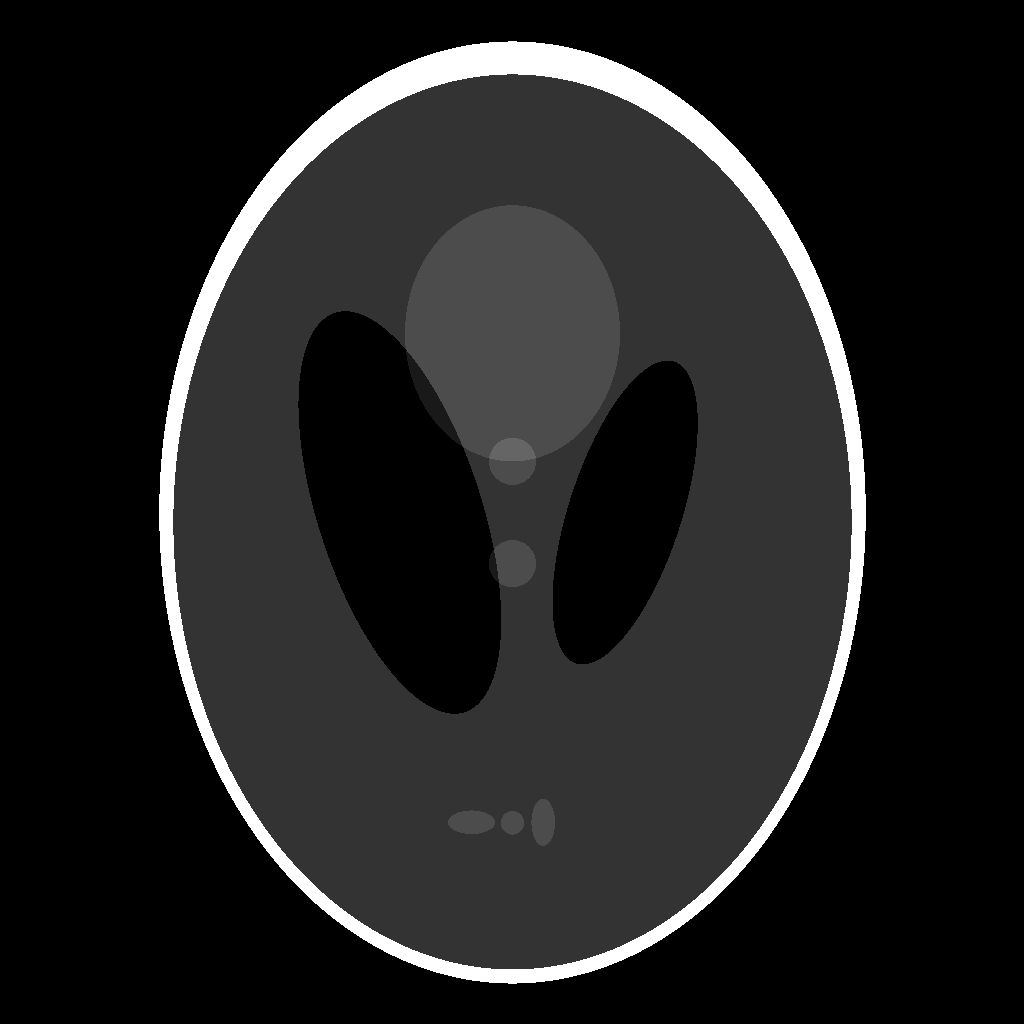

In [134]:
image_name_jpeg = 'Shepp_logan.jpg'
image_jpeg = PIL_open(image_name_jpeg)
width, height = image_jpeg.size
print("RESOLUTION OF YOUR IMAGE IS: ", width, " X ", height)

a, b = is_bmp(image_name_jpeg)
path = Path(b + ".bmp")
image_name_bmp = str(b) + '.bmp'
grayscale_image = image_jpeg.convert('L')

if not a:
    if not path.exists():
        grayscale_image.save(image_name_bmp)

image_bmp = PIL_open(image_name_bmp)
pixel_data = list(image_bmp.getdata())
    
# każdy pixel top wartość od 0 - 255, tym bliżej 0 tym bardziej pixel jest czarny (nasycenie)
d = min(width, height)  # diameter equal to shorter side of our image
b = max(width, height)

pixel_array = np.array(pixel_data)
pixel_matrix = pixel_array.reshape(height, width)
np.set_printoptions(threshold=np.inf)

if width > height:
    if (b - d) % 2 == 0:
        pixel_matrix = pixel_matrix[:, int((b-d)/2): -int((b-d)/2)]
    else:
        pixel_matrix = pixel_matrix[:, int((b-d)/2) + 1 : -int((b-d)/2)]
elif height > width:
    if (b - d) % 2 == 0:
        pixel_matrix = pixel_matrix[int((b-d)/2) : -int((b-d)/2), :]
    else:
        pixel_matrix = pixel_matrix[int((b-d)/2) + 1 : -int((b-d)/2), :]

display(image_bmp)

# Parameters definitions:

In [135]:
l = 90  # rozpiętość kątowa
x = 90  # ilość skanów
n = 180  # ilość detektorów

emitter_rotation = 360 / x
l_grad = deg_to_grad(l)

# Line Generation for every emitter - detector combination:

In [136]:
r = d / 2
line_matrix = np.full((n, x), None, dtype = object)

# line generation for every emitter - detector combination
for alpha in range(0, 360, int(emitter_rotation)):

    alpha_pom = deg_to_grad(alpha)
    emitter_position_x = int(central_to_left_upper_x(r * math.cos(alpha_pom), d))
    emitter_position_y = int(central_to_left_upper_y(r * math.sin(alpha_pom), d))    

    for i in range(0, n):
        detector_position_x = int(central_to_left_upper_x(r * math.cos(alpha_pom + math.pi - l_grad/2 + (i * (l_grad / (n - 1)))), d))
        detector_position_y = int(central_to_left_upper_y(r * math.sin(alpha_pom + math.pi - l_grad/2 + (i * (l_grad / (n - 1)))), d))
        line = line_nd((emitter_position_y, emitter_position_x), (detector_position_y, detector_position_x), endpoint = True, integer = True)
        line_matrix[i][int(alpha/emitter_rotation)] = line
        
lines = line_matrix.copy()

# Visualization of each line between scanner - detector.

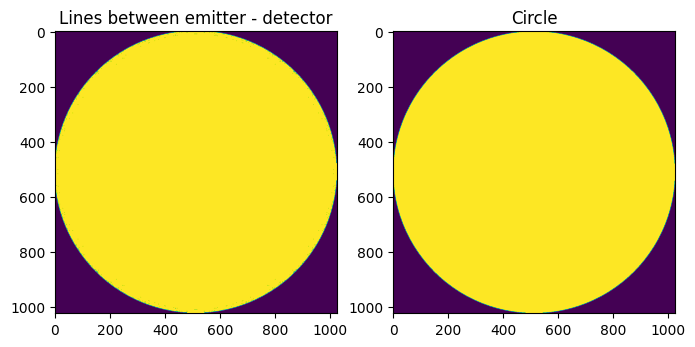

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

s = np.zeros(shape = (d, d))
for i in range(n):
    for j in range(x):
        for k in range(len(line_matrix[i][j][0])):

            # print(line_matrix[i][j][0], ' ', line_matrix[i][j][1])
            if line_matrix[i][j][0][k] != 0 or line_matrix[i][j][1][k] != 0:
                s[line_matrix[i][j][0][k] - 1][line_matrix[i][j][1][k] - 1] = 255
            else:    
                s[line_matrix[i][j][0][k]][line_matrix[i][j][1][k]] = 255
                

ax1.set_title("Lines between emitter - detector")
w = np.zeros(shape = (d, d))
center_x, center_y = d/2, d/2
x_coord = np.arange(d)
y_coord = np.arange(d)
xx, yy = np.meshgrid(x_coord, y_coord)
distance_from_center = np.sqrt((xx - center_x) ** 2 + (yy - center_y) ** 2)
w[distance_from_center <= r] = 255
ax2.imshow(w)
ax2.set_title("Circle")
ax1.imshow(s)

# Summing + normalizing all pixels' grayness for each line

In [138]:
# iterate over every detector
for i in range(n):
    # iteration over every position of emitter
    for j in range(len(line_matrix[i])):
        sum_of_pixels_for_line = 0
        # iteration over every pixel of a line
        for k in range(len(line_matrix[i][j][0])):
            sum_of_pixels_for_line += pixel_matrix[line_matrix[i][j][0][k] - 1][line_matrix[i][j][1][k] - 1]
        # each cell = sum of pixels for single detector's position
        line_matrix[i][j] = sum_of_pixels_for_line

# normalization
max_value = np.amax(line_matrix)
min_value = np.amin(line_matrix)

'''
print(f"{min_value = } {max_value = }")
print(f"{line_matrix = }")
'''

for i in range(n):
    line_matrix[i] = ((line_matrix[i] - min_value) / (max_value - min_value)) * 255
# print(f"{line_matrix = }")

# Visualization and comparison to built-in function


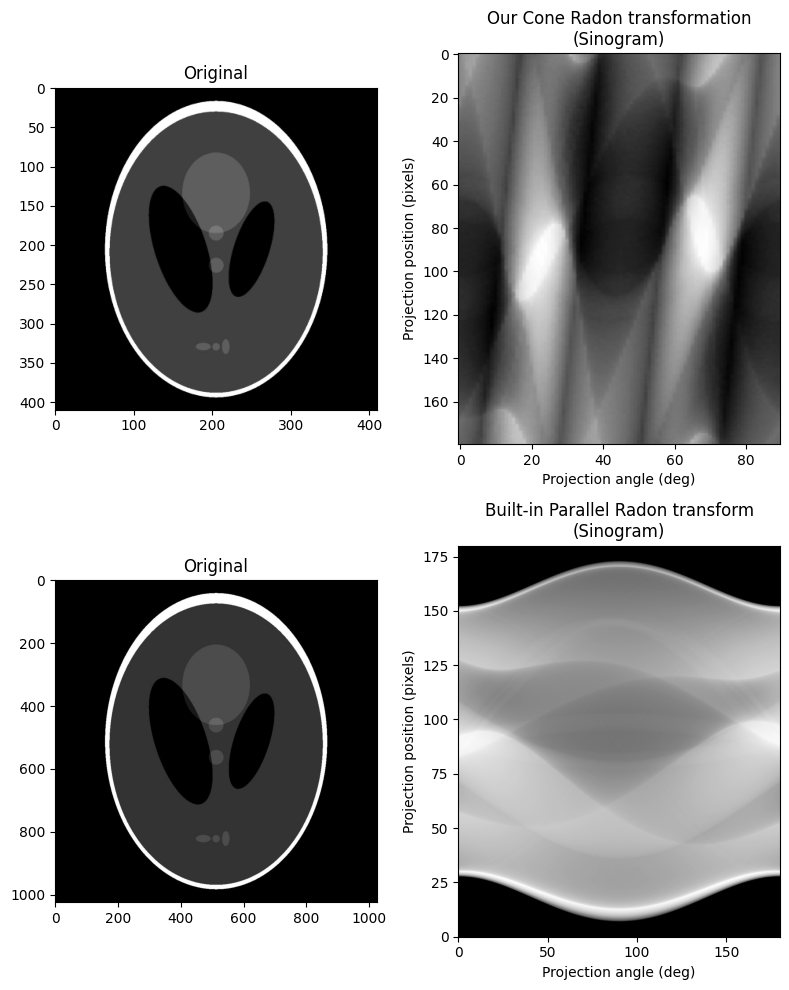

In [139]:
sinogram = line_matrix.astype(np.uint32)

# built-in function image 
image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

# plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 10))
    # our transformation
image_rescaled = rescale(np.array(image_jpeg), scale=0.4, mode='reflect', channel_axis=None)
ax1.set_title("Original")
ax1.imshow(image_rescaled, cmap=plt.cm.Greys_r)

ax2.set_title("Our Cone Radon transformation\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(
    sinogram,
    cmap=plt.cm.Greys_r,
    aspect='auto',
)

    # built-in transformation
ax3.set_title("Original")
ax3.imshow(image_jpeg, cmap=plt.cm.Greys_r)

pixel_array_two = pixel_array.reshape(height, width)

ax4.set_title("Original")
ax4.imshow(pixel_array_two, cmap=plt.cm.Greys_r)
theta = np.linspace(0.0, 180.0, max(pixel_array_two.shape), endpoint=False)
sinogram_two = radon(pixel_array_two, theta=theta)
dx, dy = 0.5 * 180.0 / max(pixel_array_two.shape), 0.5 / sinogram.shape[0]
ax4.set_title("Built-in Parallel Radon transform\n(Sinogram)")
ax4.set_xlabel("Projection angle (deg)")
ax4.set_ylabel("Projection position (pixels)")
ax4.imshow(
    sinogram_two,
    cmap=plt.cm.Greys_r,
    extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
    aspect='auto',
)

fig.tight_layout()
plt.show()

# Rekonstrukcja obrazu

Text(0.5, 1.0, 'Reconstructed image')

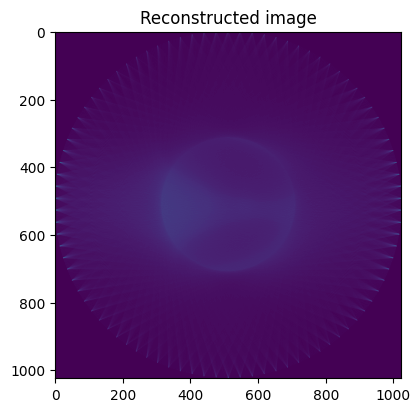

In [140]:
output_image = np.zeros((width, height))

for i in range(sinogram.shape[0]):
    for j in range(sinogram.shape[1]):
        for k in range(len(lines[i][j][0])):
            output_image[lines[i][j][1][k] - 1][lines[i][j][0][k] - 1] += sinogram[i][j]
             
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.5))
ax1.imshow(output_image)
ax1.set_title("Reconstructed image")

# Filtracja 'Rak-Lam' sinogramu:

number_freq = 256


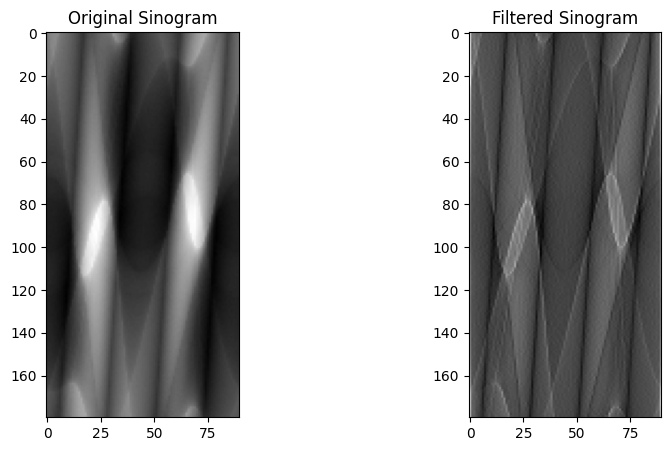

In [141]:
def apply_filter(sinogram):
    num_projections, num_detectors = sinogram.shape
    
    number_freq = 2 * int(2**(int(np.ceil(np.log2(num_detectors)))))
    print(f"{number_freq = }")
    filter_array = 2 * np.arange(number_freq + 1)/np.float32(2 * number_freq)
    filter_array = np.concatenate((filter_array, filter_array[number_freq - 1:0:-1]), axis = 0)
    
    final_sinogram = np.concatenate((sinogram, np.zeros((num_projections, 2 * number_freq - num_detectors))), axis = 1)
    
    for i in range(num_projections):
        final_sinogram[i, :] = np.real(np.fft.ifft(np.fft.fft(final_sinogram[i, :]) * filter_array))
        
    return final_sinogram[:, :num_detectors]


filtered_sinogram = apply_filter(sinogram)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sinogram, cmap='gray')
plt.title('Original Sinogram')
plt.subplot(1, 2, 2)
plt.imshow(filtered_sinogram, cmap='gray')
plt.title('Filtered Sinogram')
plt.show()